# Training classifiers!

### This notebook was built to train a few classifiers to identify whether or not we can predict calculated value from one season to the next. Initially, we will train a random forest classifier on a 70/30 train/test split from the 2012-2013 season. The other classifiers used will be as follows:

* Random forest, trained on 2012-2013, predicting on 2013-2014
* Linear Regression on a 70/30 train/test split from the 2012-2013 season.
* Linear Regression trained on 2012-2013, predicting on 2013-2014

In [29]:
% matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# Import all ML modules and packages we'll need
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor



In [4]:
features12 = pd.read_pickle('features12-13.pkl').transpose()
features13 = pd.read_pickle('features13-14.pkl').transpose()

In [5]:
features12.head()

,avg_value,avg_value_smoothed,cum_value_list,match_value_list,nassists,naway_assists,naway_goals,nearly_assists,nearly_goals,nequalizer_assists,nequalizer_goals,ngoals,nhome_assists,nhome_goals,nlate_assists,nlate_goals,nmid_assists,nmid_goals,nsub_assists,nsub_goals,ntiebreaker_assists,ntiebreaker_goals,season_value,smoothed_value_list
Aaron Hunt,1.142434,1.19568,"[0, 3.75, 4.9, 4.9, 8.35, 8.35, 8.35, 9.1, 9.1...","[0, 3.75, 1.15, 0, 3.45, 0, 0, 0.75, 0, 8.0, 3...",4,0,5,0,3,0,2,11,4,6,1,1,3,7,0,2,1,8,43.4125,"[0.0, 1.875, 1.63333333333, 1.225, 1.67, 1.67,..."
Aaron Lennon,0.6901316,0.5942928,"[0, 0, 0, 3.1625, 3.1625, 3.1625, 4.1625, 6.91...","[0, 0, 0, 3.1625, 0, 0, 1.0, 2.75, 0, 0, 0, 0,...",7,2,1,1,1,1,0,4,5,3,2,0,4,3,0,0,4,2,26.225,"[0.0, 0.0, 0.0, 0.790625, 0.6325, 0.6325, 0.83..."
Aaron Ramsey,0.1848684,0.1690789,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.1625...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.1625...",2,2,0,1,0,0,0,1,0,1,1,0,0,1,1,0,1,0,7.025,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
Abdelaziz Barrada,0.7023026,0.7875164,"[0, 5.5, 8.6625, 8.6625, 11.825, 14.575, 14.57...","[0, 5.5, 3.1625, 0, 3.1625, 2.75, 0, 0, 0, 0, ...",6,1,2,1,0,1,2,4,5,2,2,0,3,4,0,0,3,2,26.6875,"[0.0, 2.75, 2.8875, 2.165625, 2.365, 2.915, 1...."
Abdou TraorÃ©,0.01973684,0.003947368,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.75,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [9]:
features12.columns

Index([u'avg_value', u'avg_value_smoothed', u'cum_value_list', u'match_value_list', u'nassists', u'naway_assists', u'naway_goals', u'nearly_assists', u'nearly_goals', u'nequalizer_assists', u'nequalizer_goals', u'ngoals', u'nhome_assists', u'nhome_goals', u'nlate_assists', u'nlate_goals', u'nmid_assists', u'nmid_goals', u'nsub_assists', u'nsub_goals', u'ntiebreaker_assists', u'ntiebreaker_goals', u'season_value', u'smoothed_value_list'], dtype='object')

### Pull out the features that we will predict on

In [10]:
features_to_predict = ['avg_value','avg_value_smoothed','nassists','naway_assists','naway_goals','nearly_assists','nearly_goals',
                       'nequalizer_assists','nequalizer_goals','ngoals','nhome_assists','nhome_goals','nlate_assists','nlate_goals',
                       'nmid_assists','nmid_goals','nsub_assists','nsub_goals','ntiebreaker_assists','ntiebreaker_goals']

In [22]:
featDF12 = features12[features_to_predict]
featDF13 = features13[features_to_predict]
target12 = features12['season_value']
target13 = features13['season_value']

In [13]:
featDF12.head()

,avg_value,avg_value_smoothed,nassists,naway_assists,naway_goals,nearly_assists,nearly_goals,nequalizer_assists,nequalizer_goals,ngoals,nhome_assists,nhome_goals,nlate_assists,nlate_goals,nmid_assists,nmid_goals,nsub_assists,nsub_goals,ntiebreaker_assists,ntiebreaker_goals
Aaron Hunt,1.142434,1.19568,4,0,5,0,3,0,2,11,4,6,1,1,3,7,0,2,1,8
Aaron Lennon,0.6901316,0.5942928,7,2,1,1,1,1,0,4,5,3,2,0,4,3,0,0,4,2
Aaron Ramsey,0.1848684,0.1690789,2,2,0,1,0,0,0,1,0,1,1,0,0,1,1,0,1,0
Abdelaziz Barrada,0.7023026,0.7875164,6,1,2,1,0,1,2,4,5,2,2,0,3,4,0,0,3,2
Abdou TraorÃ©,0.01973684,0.003947368,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


### Create test-train-split on 2012-13 data

In [24]:
np.mean(target12), np.mean(target13)

(12.550972263980771, 12.377898903775909)

We see that the two seasons have similar means in player value

In [25]:
itrain, itest = train_test_split(xrange(featDF12.shape[0]), train_size=0.7)
mask=np.ones(featDF12.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [26]:
np.mean(target12[mask]), np.mean(target12[~mask])

(12.357398518041249, 13.002515030060124)

By splitting the data into training and test subsets, we don't significantly alter the target means. Pretty good, let's continue!

In [27]:
Xtrain12_1, Xtest12_1 = featDF12[mask], featDF12[~mask]
Ytrain12_1, Ytest12_1 = target12[mask], target12[~mask]

In [30]:
forest = RandomForestRegressor(n_estimators=50).fit(Xtrain12_1,Ytrain12_1)

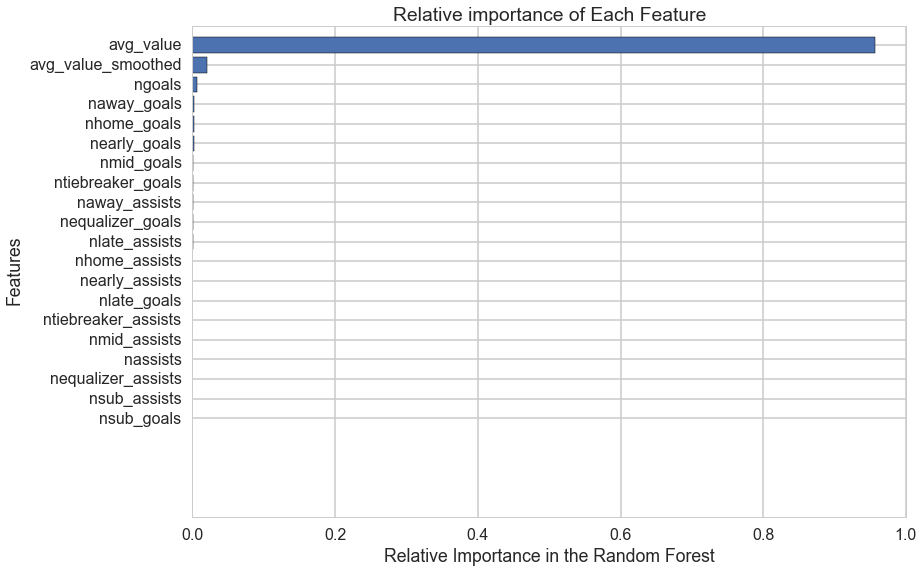

In [32]:
importance_list = forest.feature_importances_
name_list = featDF12.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

### Here we see that  the importance of the 'avg_value' and 'avg_value_smoothed' features far outweigh the others. After seeing this, we'll remove the two of them and only use the incremented totals for goals and assists.

In [33]:
features_to_predict = ['nassists','naway_assists','naway_goals','nearly_assists','nearly_goals',
                       'nequalizer_assists','nequalizer_goals','ngoals','nhome_assists','nhome_goals','nlate_assists','nlate_goals',
                       'nmid_assists','nmid_goals','nsub_assists','nsub_goals','ntiebreaker_assists','ntiebreaker_goals']

In [34]:
featDF12 = features12[features_to_predict]
featDF13 = features13[features_to_predict]
target12 = features12['season_value']
target13 = features13['season_value']

In [35]:
itrain, itest = train_test_split(xrange(featDF12.shape[0]), train_size=0.7)
mask=np.ones(featDF12.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [36]:
Xtrain12_1, Xtest12_1 = featDF12[mask], featDF12[~mask]
Ytrain12_1, Ytest12_1 = target12[mask], target12[~mask]

In [37]:
forest = RandomForestRegressor(n_estimators=50).fit(Xtrain12_1,Ytrain12_1)

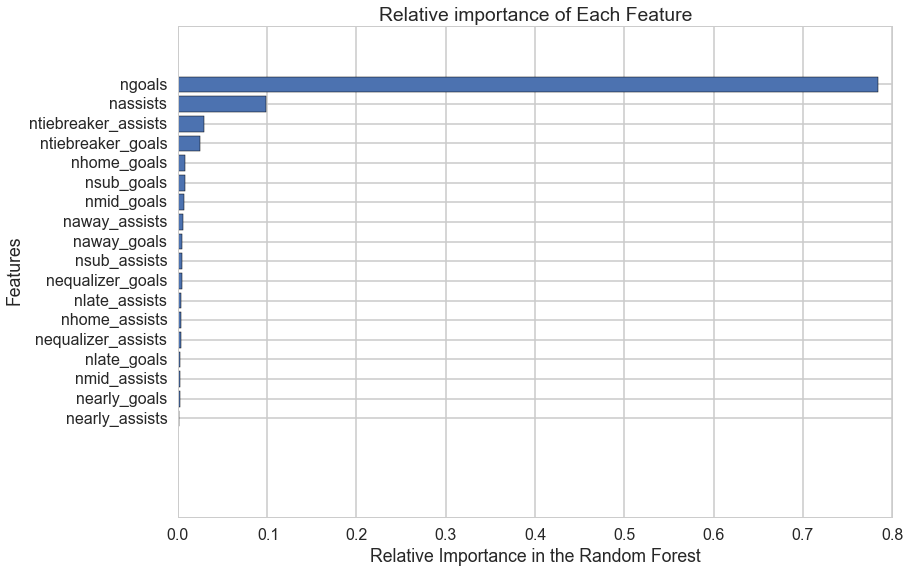

In [38]:
importance_list = forest.feature_importances_
name_list = featDF12.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

### Even though the 'ngoals' feature far outweighs all others, we still see that each feature happens to contribute somewhat to the regression. We'll keep this classifier as is.

In [40]:
print "The accuracy of our regressor on the training set is: ", forest.score(Xtrain12_1, Ytrain12_1)
print "The accuracy of our regressor on the test set is: ", forest.score(Xtest12_1, Ytest12_1)

The accuracy of our regressor on the training set is:  0.991415942989
The accuracy of our regressor on the test set is:  0.958932187261


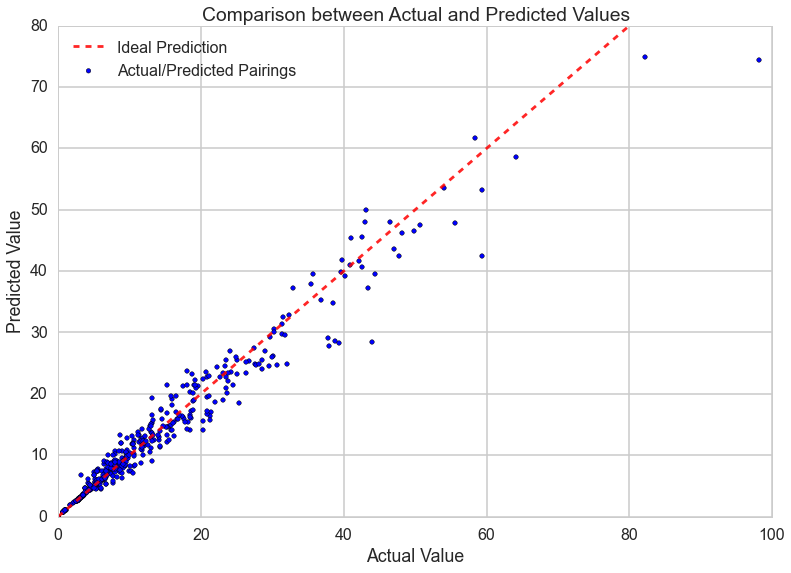

In [51]:
# Plot scatter of predictions vs. actual
Ypred12_1 = forest.predict(Xtest12_1)
plt.figure()
plt.plot(range(81),range(81),'r--',alpha=0.85,label="Ideal Prediction")
plt.scatter(Ytest12_1,Ypred12_1,label="Actual/Predicted Pairings")
plt.xlim([0, 100])
plt.ylim([0, 80])
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Comparison between Actual and Predicted Values")
plt.legend(loc=0)
plt.show()


### So we see that we generally perform quite well within a season. The random forest regressor tends to under predict the value of a player as that player's actual value increases. This highlights how much of an outlier these elite high-valued players are. The hope is that by training on one season, testing on the next, will help capture these outlier players.

### Another option that we have to try and improve our predictions with respect to these outliers will be to train an ordinary linear regression. The thinking is that since our model is a linear combination of goals and assists that a regression will accurately learn the weights that go into measuring player value, as per our model.